In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Dataset

In [124]:
df = pd.read_csv("/content/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


* ID for each pokemon
* Name: Name of each pokemon
* Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
* Type 2: Some pokemon are dual type and have 2
* Total: sum of all stats that come after this, a general guide to how strong a pokemon is
* HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
* Attack: the base modifier for normal attacks (eg. Scratch, Punch)
* Defense: the base damage resistance against normal attacks
* SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* SP Def: the base damage resistance against special attacks
* Speed: determines which pokemon attacks first each round
* Generation: Number of generation
* Legendary: True if Legendary Pokemon False if not (more revision on mythical vs legendary needed)


source: https://www.kaggle.com/datasets/abcsds/pokemon






In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


There are some missing value in Type 2 column

In [126]:
# Convert the data type of the variable 'Generation' to string
df['Generation'] = df['Generation'].astype(object)

In [127]:
df.shape

(800, 13)

The dataset consist of 800 rows and 13 columns

In [128]:
# Statistical description of numeric variables
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [129]:
df_categorical = df[['Type 1', 'Type 2','Generation']]
for i in df_categorical.columns:
  print(f"{i}: {df_categorical[i].unique()}", "\n")

Type 1: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying'] 

Type 2: ['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal'] 

Generation: [1 2 3 4 5 6] 



# Data Cleaning

In [130]:
# Drop unrelevant column
df = df.drop(columns=['#'])

In [131]:
# Check duplicate data
df.duplicated().sum()

0

In [132]:
# check missing value
df.isna().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Missing values are left as is because there are Pokémon that are not dual type

In [133]:
# Imputing missing values
df['Type 2'] = df['Type 2'].fillna('Single Type')

# EDA

## Type 1

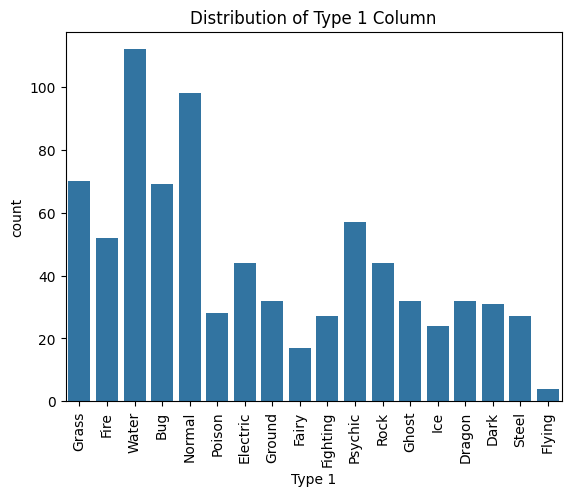

In [134]:
sns.countplot(data=df, x='Type 1')
plt.xticks(rotation=90)
plt.title('Distribution of Type 1 Column')
plt.show()

Water is the most common type among Pokémon in type 1, followed by Normal

## Type 2

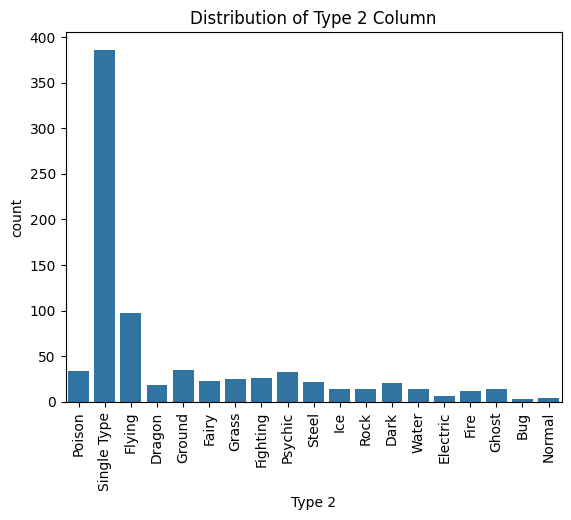

In [135]:
dual_type = df[df['Type 2'] != 'Not Dual Type']
sns.countplot(data=dual_type, x='Type 2')
plt.xticks(rotation=90)
plt.title('Distribution of Type 2 Column')
plt.show()

The most common Type 2 among Pokémon is Flying

(-1.1718100351338365,
 1.1034195254242072,
 -1.1766043948156963,
 1.1036477554920885)

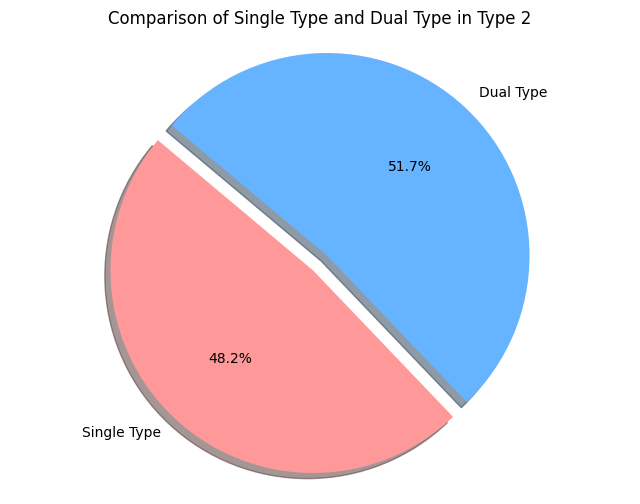

In [136]:
count_dash = (df['Type 2'] == 'Single Type').sum()
count_not_dash = (df['Type 2'] != 'Single Type').sum()

labels = ['Single Type', 'Dual Type']
sizes = [count_dash, count_not_dash]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Comparison of Single Type and Dual Type in Type 2')
plt.axis('equal')

Dual-type Pokémon are slightly more prevalent than single-type Pokémon, though the difference is marginal at 3.5%.

## Total

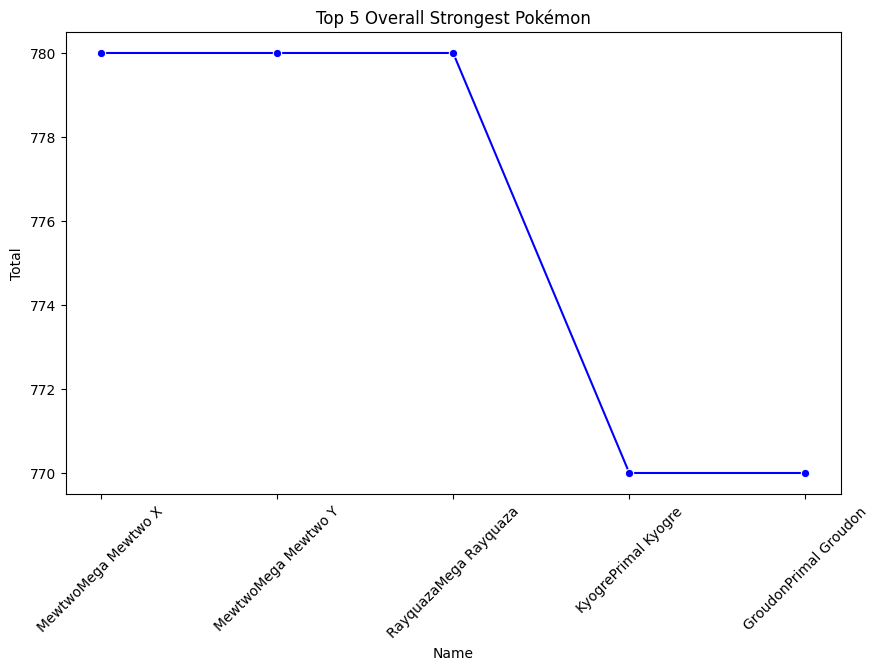

In [137]:
total_top5 = df.nlargest(5, 'Total')
total_top5[['Name','Total']]

plt.figure(figsize=(10,6))
sns.lineplot(data=total_top5, x='Name', y='Total', marker='o', color='b')
plt.title('Top 5 Overall Strongest Pokémon')
plt.xlabel('Name')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

There are 3 Pokémon with the highest Total stats that are tied for the same value:
* MewtwoMega Mewtwo X
* MewtwoMega Mewtwo Y
* RayquazaMega Rayquaza

Following them, two Pokémon share the next highest point value:
* GroudonPrimal Groudon
* KyogrePrimal Kyogre

Total stats serve as a general indicator of a Pokémon's strength, so the five Pokémon listed above are among the top five strongest Pokémon



In [138]:
total_names = total_top5['Name'].tolist()
df[df['Name'].isin(total_names)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,MewtwoMega Mewtwo Y,Psychic,Single Type,780,106,150,70,194,120,140,1,True
422,KyogrePrimal Kyogre,Water,Single Type,770,100,150,90,180,160,90,3,True
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


Among the top five strongest Pokémon listed, three are dual types while the other two are single types. These five Pokémon are all legendary, hailing from Generation 1 and Generation 3

## Hit Point (HP)

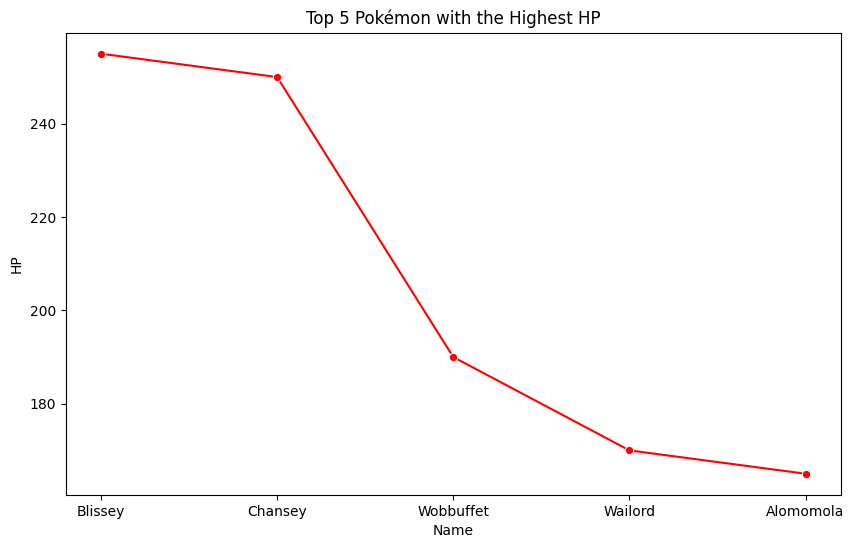

In [139]:
HP_top5 = df.nlargest(5, 'HP')
HP_top5[['Name', 'HP']]

plt.figure(figsize=(10,6))
sns.lineplot(data=HP_top5, x='Name', y='HP', marker='o', color='r')
plt.title('Top 5 Pokémon with the Highest HP')
plt.xlabel('Name')
plt.ylabel('HP')
plt.show()

Top 5 Pokémon with the Highest HP
1. Blissey
2. Chansey
3. Wobbuffet
4. Wailord
5. Alomomola



In [140]:
hp_name = HP_top5['Name'].tolist()
df[df['Name'].isin(hp_name)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,Chansey,Normal,Single Type,450,250,5,5,35,105,50,1,False
217,Wobbuffet,Psychic,Single Type,405,190,33,58,33,58,33,2,False
261,Blissey,Normal,Single Type,540,255,10,10,75,135,55,2,False
351,Wailord,Water,Single Type,500,170,90,45,90,45,60,3,False
655,Alomomola,Water,Single Type,470,165,75,80,40,45,65,5,False


None of these are legendary, and all are single types from Generations 1, 2, 3, and 5.

## Attack

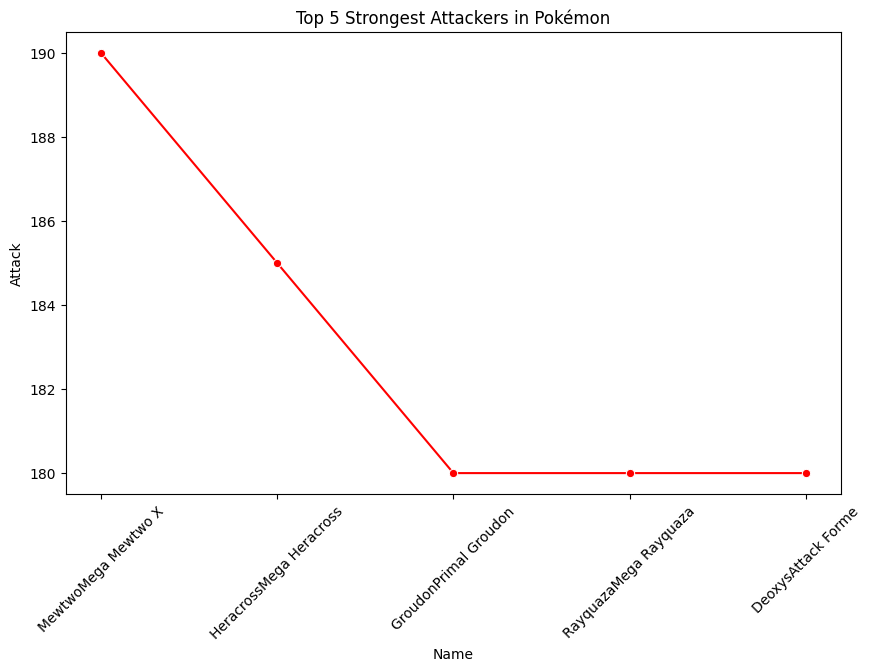

In [141]:
attack_top5 = df.nlargest(5, 'Attack')
attack_top5[['Name', 'Attack']]

plt.figure(figsize=(10,6))
sns.lineplot(data=attack_top5, x='Name', y='Attack', marker='o', color='r')
plt.title('Top 5 Strongest Attackers in Pokémon')
plt.xlabel('Name')
plt.ylabel('Attack')
plt.xticks(rotation=45)
plt.show()

Top 5 Strongest Attackers in Pokémon (with the highest Attack values):
1. MewtwoMega Mewtwo X
2. HeracrossMega Heracross

and there are three Pokémon tied for the third position:
* GroudonPrimal Groudon
* RayquazaMega Rayquaza
* DeoxysAttack Forme

In [142]:
att_name = attack_top5['Name'].tolist()
df[df['Name'].isin(att_name)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,DeoxysAttack Forme,Psychic,Single Type,600,50,180,20,180,20,150,3,True


All are dual-type, with one being non-legendary. They hail from Generations 1, 2, and 3, with a notable prevalence of Psychic and Fighting types.

## Defense

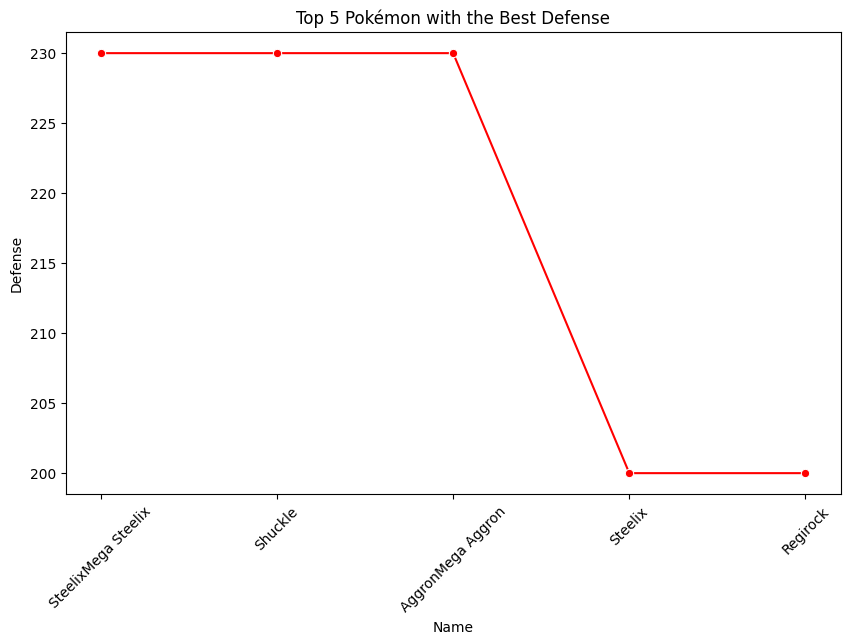

In [143]:
defense_top5 = df.nlargest(5, 'Defense')
defense_top5[['Name', 'Defense']]

plt.figure(figsize=(10,6))
sns.lineplot(data=defense_top5, x='Name', y='Defense', marker='o', color='r')
plt.title('Top 5 Pokémon with the Best Defense')
plt.xlabel('Name')
plt.ylabel('Defense')
plt.xticks(rotation=45)
plt.show()

There are 3 Pokémon with the highest defense value that are tied for the same value:

* SteelixMega Steelix
* Shuckle
* AggronMega Aggron

followed by 2 Pokémon with the same point value:
* Steelix
* Regirock


In [144]:
defense_name = defense_top5['Name'].tolist()
df[df['Name'].isin(defense_name)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
223,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
224,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,AggronMega Aggron,Steel,Single Type,630,70,140,230,60,80,50,3,False
414,Regirock,Rock,Single Type,580,80,100,200,50,100,50,3,True


All are dual-type, with one being legendary. These Pokémon are from Generations 2 and 3.

## Special Attack

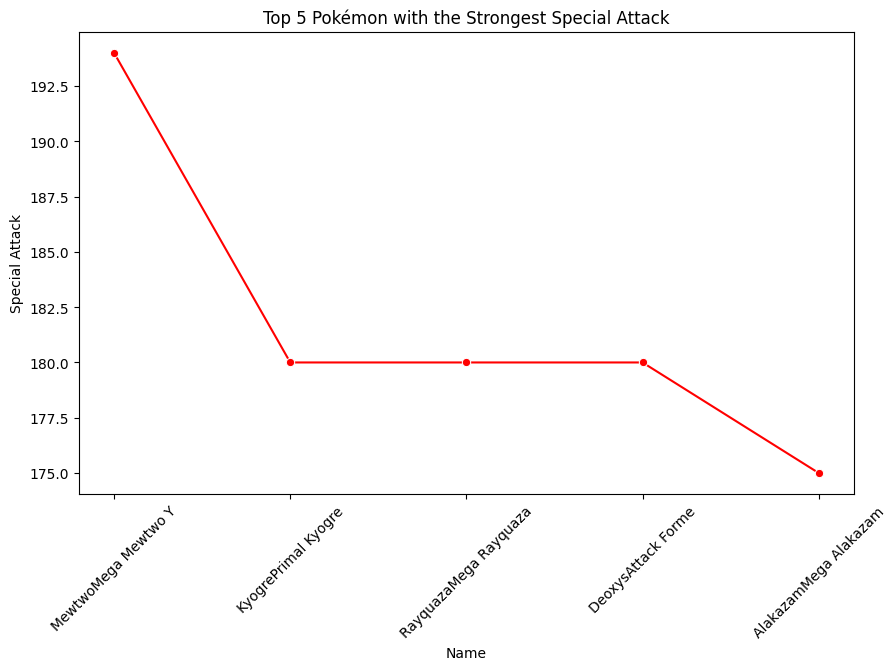

In [145]:
spatk_top5 = df.nlargest(5, 'Sp. Atk')

plt.figure(figsize=(10,6))
sns.lineplot(data=spatk_top5, x='Name', y='Sp. Atk', marker='o', color='r')
plt.title('Top 5 Pokémon with the Strongest Special Attack')
plt.xlabel('Name')
plt.ylabel('Special Attack')
plt.xticks(rotation=45)
plt.show()

Top 5 Pokémon with the Strongest Special Attack:
1. MewtwoMega Mewtwo Y
2. In second place, there are three Pokémon: KyogrePrimal Kyogre, RayquazaMega Rayquaza, and DeoxysAttack Forme
3. AlakazamMega Alakazam

In [146]:
spatk_name = spatk_top5['Name'].tolist()
df[df['Name'].isin(spatk_name)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
71,AlakazamMega Alakazam,Psychic,Single Type,590,55,50,65,175,95,150,1,False
164,MewtwoMega Mewtwo Y,Psychic,Single Type,780,106,150,70,194,120,140,1,True
422,KyogrePrimal Kyogre,Water,Single Type,770,100,150,90,180,160,90,3,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,DeoxysAttack Forme,Psychic,Single Type,600,50,180,20,180,20,150,3,True


One is a dual-type and one is non-legendary, with Pokémon from Generations 1 and 3.

## Special Defense

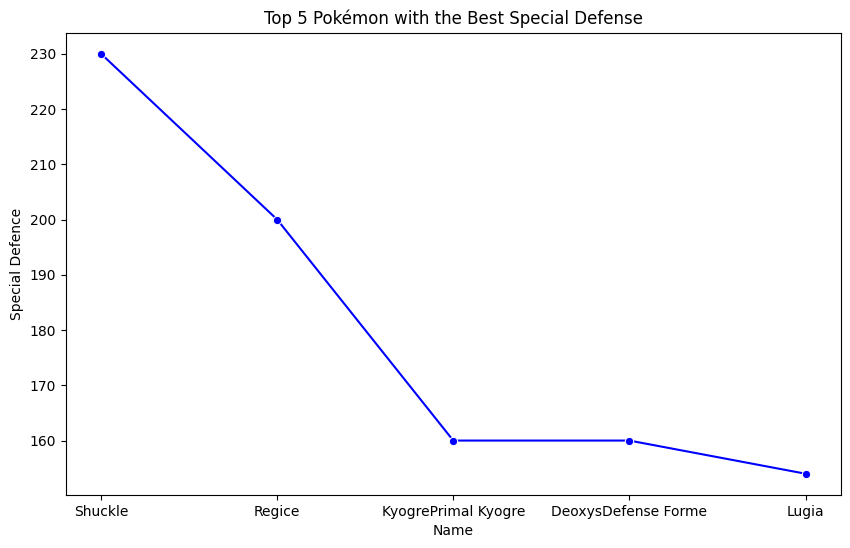

In [147]:
spdef_top5 = df.nlargest(5, 'Sp. Def')

plt.figure(figsize=(10,6))
sns.lineplot(data=spdef_top5, x='Name',  y='Sp. Def', marker='o', color='b')
plt.title('Top 5 Pokémon with the Best Special Defense')
plt.xlabel('Name')
plt.ylabel('Special Defence')
plt.show()

Top 5 Pokémon with the Best Special Defense:
1. Shuckle
2. Regice
3. KyogrePrimal Kyogre
4. DeoxysDefense Forme
5. Lugia

In [148]:
spdef_name = spdef_top5['Name'].tolist()
df[df['Name'].isin(spdef_name)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
269,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
415,Regice,Ice,Single Type,580,80,50,100,100,200,50,3,True
422,KyogrePrimal Kyogre,Water,Single Type,770,100,150,90,180,160,90,3,True
430,DeoxysDefense Forme,Psychic,Single Type,600,50,70,160,70,160,90,3,True


Two are dual-type, and one is non-legendary, spanning Generations 2 and 3.

## Speed

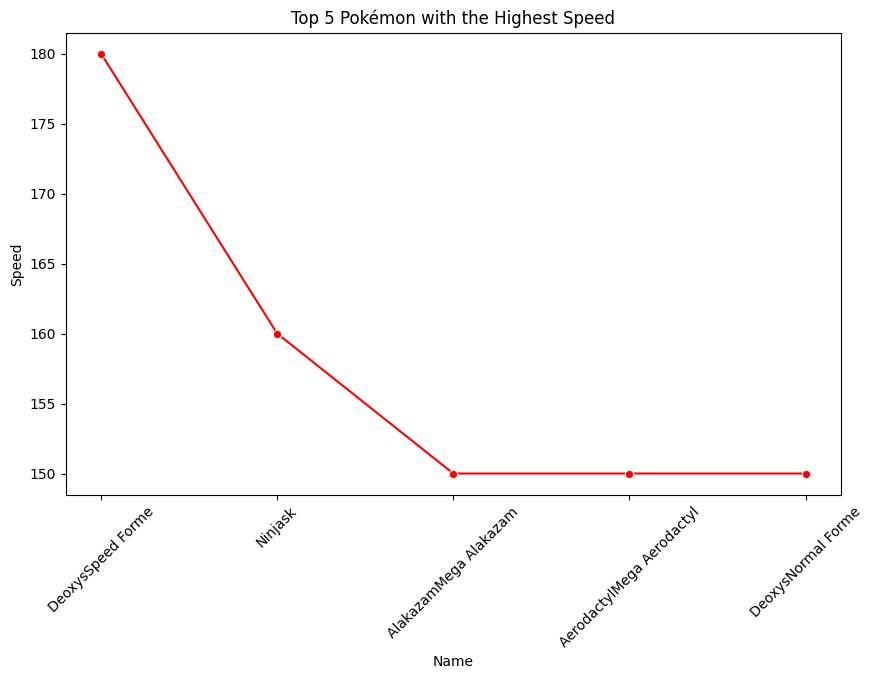

In [149]:
speed_top5 = df.nlargest(5, 'Speed')

plt.figure(figsize=(10,6))
sns.lineplot(data=speed_top5, x='Name', y='Speed', marker='o', color='r')
plt.title('Top 5 Pokémon with the Highest Speed')
plt.xlabel('Name')
plt.ylabel('Speed')
plt.xticks(rotation=45)
plt.show()

Top 5 Pokémon with the Highest Speed Value:
1. DeoxysSpeed Forme
2. Ninjask
3. In third place, there are AlakazamMega Alakazam, AerodactylMega Aerodactyl, and DeoxysNormal Forme

In [150]:
speed_name = speed_top5['Name'].tolist()
df[df['Name'].isin(speed_name)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
71,AlakazamMega Alakazam,Psychic,Single Type,590,55,50,65,175,95,150,1,False
154,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
315,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
428,DeoxysNormal Forme,Psychic,Single Type,600,50,150,50,150,50,150,3,True
431,DeoxysSpeed Forme,Psychic,Single Type,600,50,95,90,95,90,180,3,True


Two are dual-types, and two are legendary, from Generations 1 and 3.

## Generation

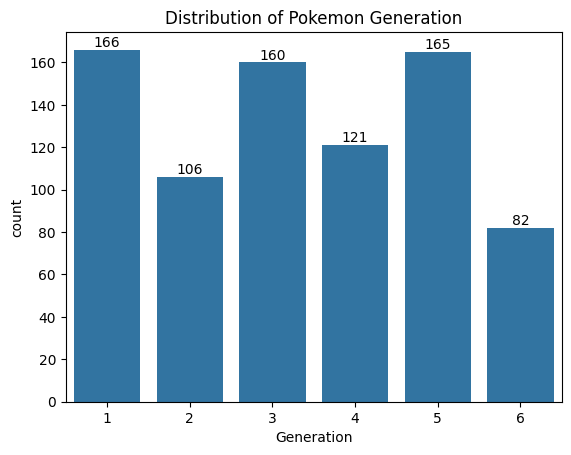

In [151]:
ax = sns.countplot(data=df, x='Generation')
plt.title('Distribution of Pokemon Generation')
ax.bar_label(ax.containers[0])
plt.show()

Generation 1 has the highest number of Pokémon (166), followed closely by Generation 5 (165) and Generation 3 (160). Generations 4, 2, and 6 follow with 121, 106, and 82 Pokémon, respectively.

## Legendary

(-1.1764427571763678,
 1.1036400331343452,
 -1.0999999632644177,
 1.0999997369452181)

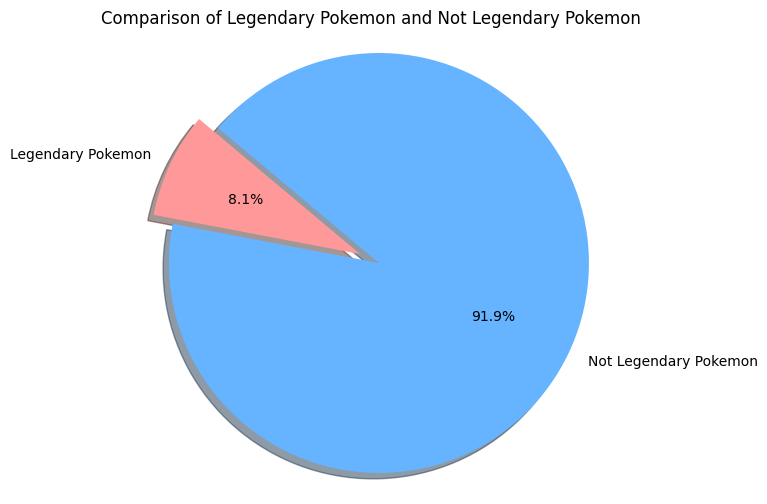

In [152]:
legend = (df['Legendary']== True).sum()
notlegend = (df['Legendary']== False).sum()

labels = ['Legendary Pokemon', 'Not Legendary Pokemon']
sizes = [legend, notlegend]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Comparison of Legendary Pokemon and Not Legendary Pokemon')
plt.axis('equal')

Among all the Pokémon in the dataset, only 8.1% are legendary

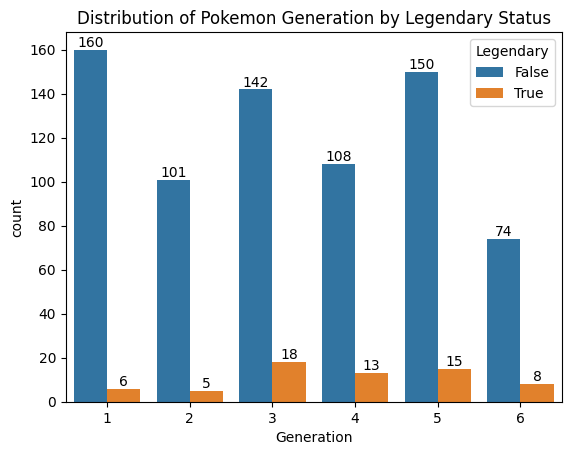

In [153]:
lab = sns.countplot(data=df, x='Generation', hue='Legendary')
for container in lab.containers:
    lab.bar_label(container)
plt.title('Distribution of Pokemon Generation by Legendary Status')
plt.show()

The highest number of legendary Pokémon is found in Generation 3

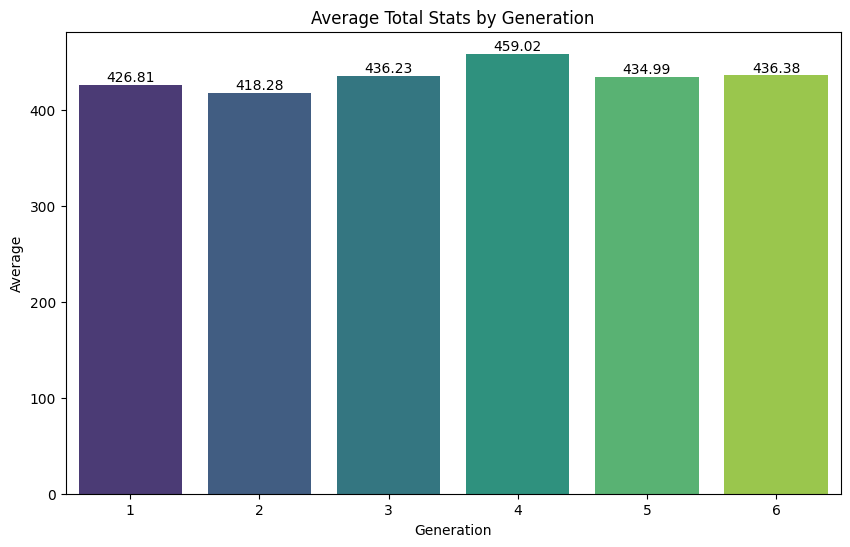

In [154]:
mean_totals = df.groupby('Generation')['Total'].mean().reset_index()

# Membuat barplot menggunakan seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=mean_totals, x='Generation', y='Total', palette='viridis')

# Menambahkan judul dan label
plt.title('Average Total Stats by Generation')
plt.xlabel('Generation')
plt.ylabel('Average')

# Menambahkan nilai di atas batang
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

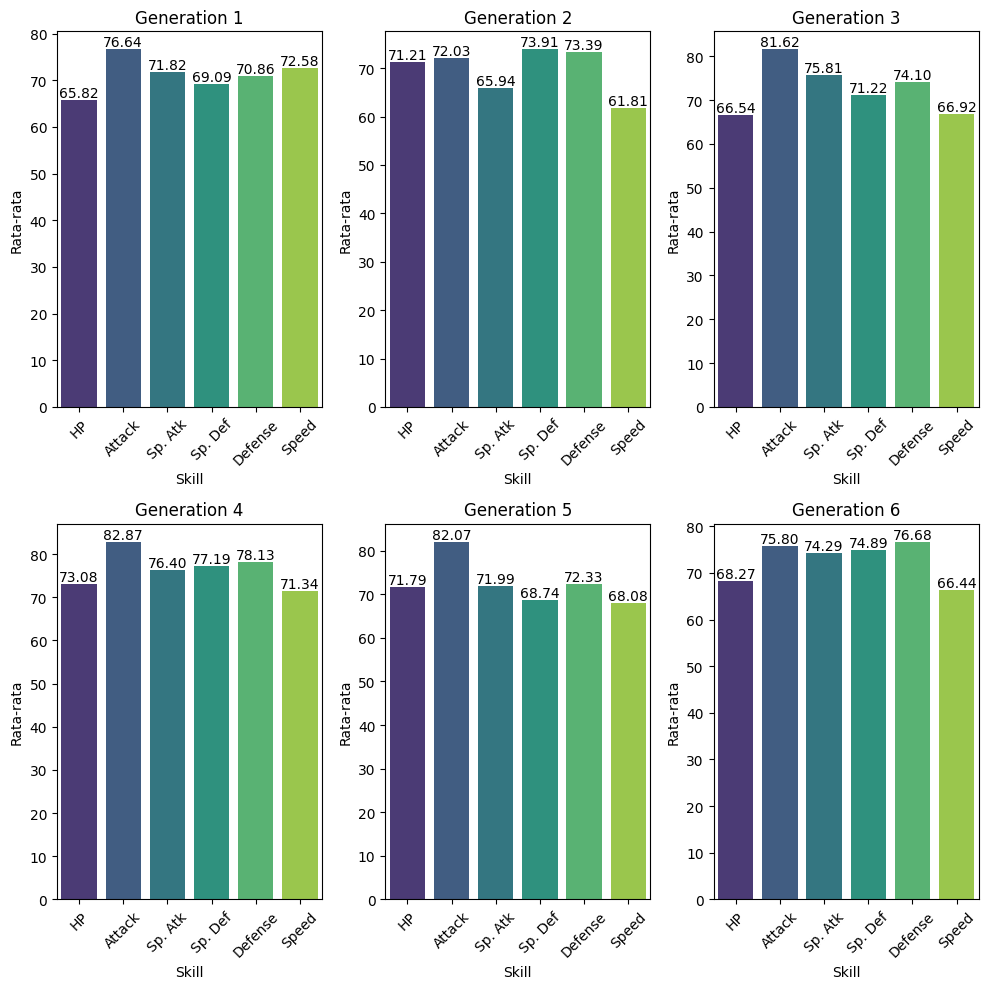

In [155]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

skills = ['HP', 'Attack', 'Sp. Atk',	'Sp. Def', 'Defense', 'Speed']
generations = df['Generation'].unique()

for i, gen in enumerate(generations):
    gen_df = df[df['Generation'] == gen]
    mean_values = gen_df[skills].mean()

    ax = axes[i // 3, i % 3]
    sns.barplot(x=mean_values.index, y=mean_values.values, palette='viridis', ax=ax)

    ax.set_title(f'Generation {gen}')
    ax.set_xlabel('Skill')
    ax.set_ylabel('Rata-rata')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    for index, value in enumerate(mean_values.values):
        ax.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Generation 4 has the highest average values for Total, HP, Attack, Defense, Special Attack, and Special Defense. However, it does not excel in Speed, which is highest in Generation 1.

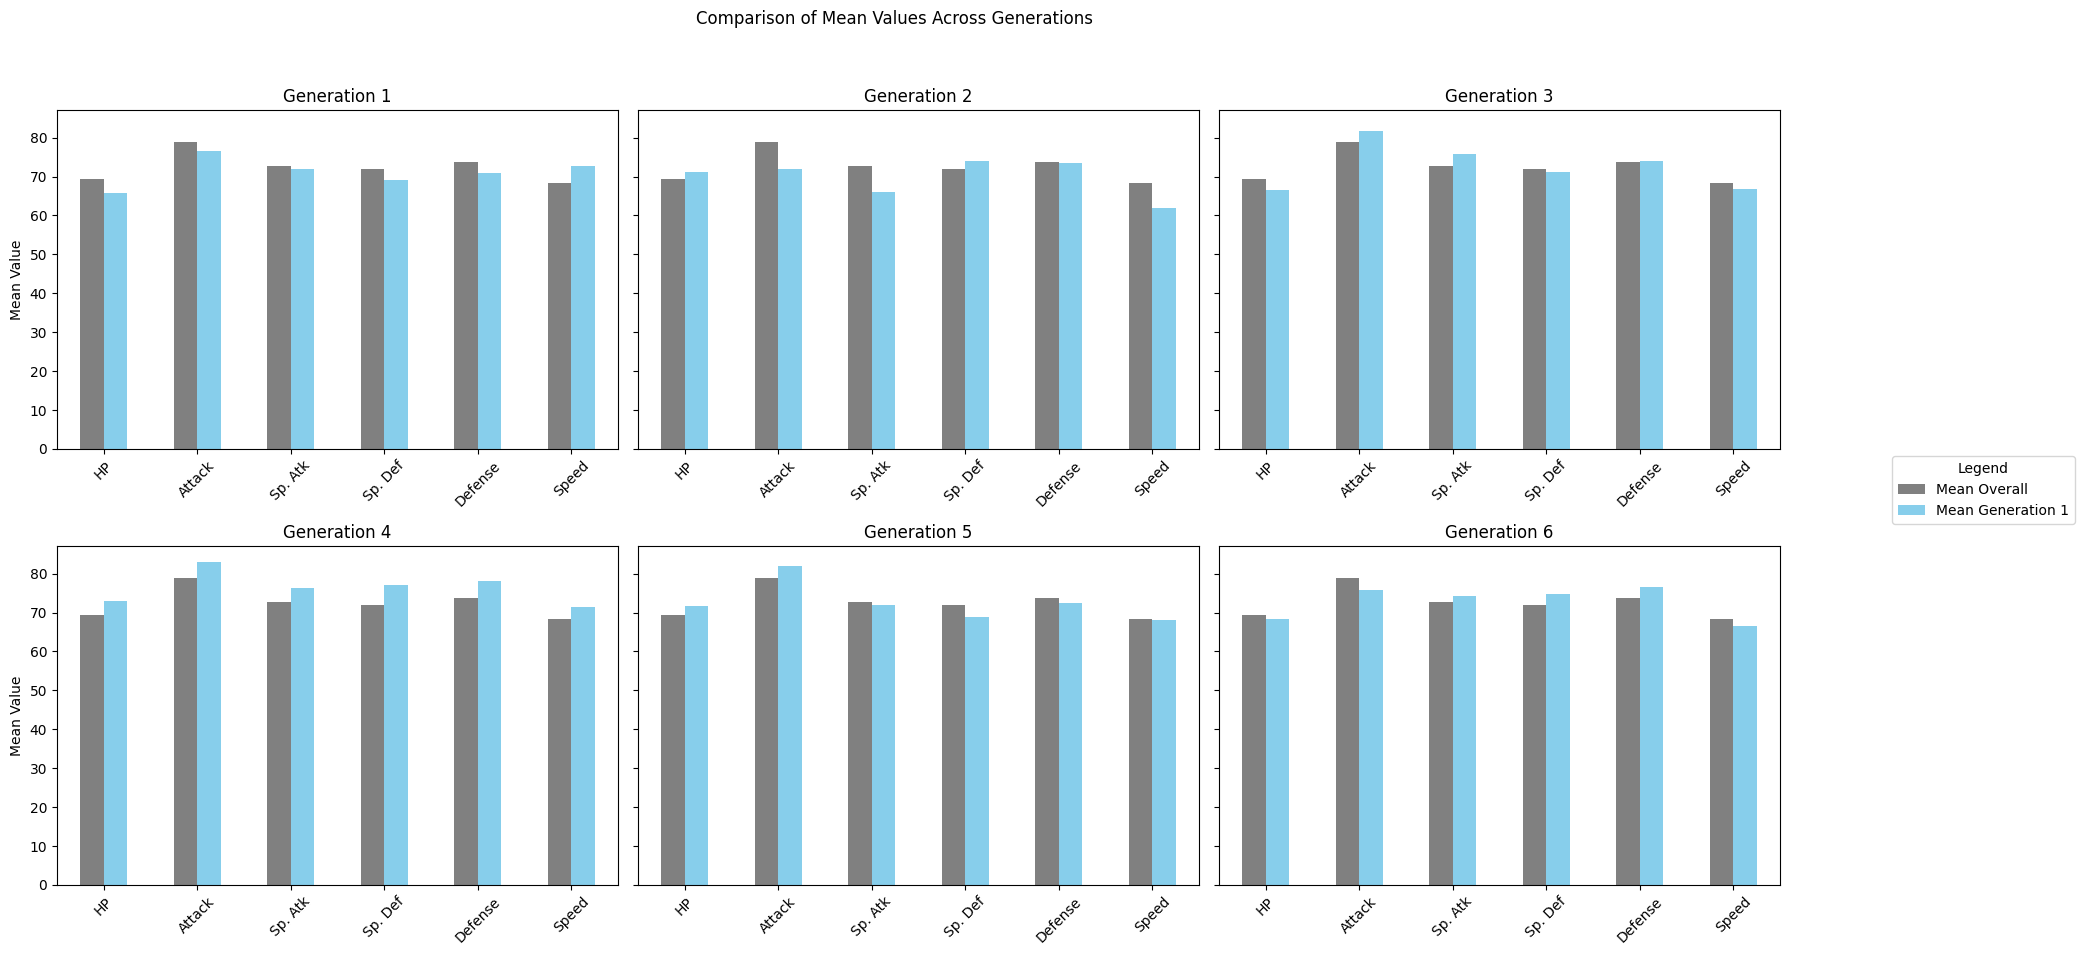

In [156]:
mean_var = df[['HP', 'Attack', 'Sp. Atk', 'Sp. Def', 'Defense', 'Speed']].mean()

generations = [1, 2, 3, 4, 5, 6]
mean_generations = {gen: df[df['Generation'] == gen][['HP', 'Attack', 'Sp. Atk', 'Sp. Def', 'Defense', 'Speed']].mean() for gen in generations}

data = {
    'Attribute': mean_var.index,
    'Mean Overall': mean_var.values
}

for gen in generations:
    data[f'Mean Generation {gen}'] = mean_generations[gen].values
mean_df = pd.DataFrame(data)

fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axs = axs.flatten()
for i, gen in enumerate(generations):
    mean_df[['Attribute', f'Mean Overall', f'Mean Generation {gen}']].set_index('Attribute').plot(kind='bar', ax=axs[i], color=['grey', 'skyblue'], legend=False)
    axs[i].set_title(f'Generation {gen}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Mean Value')
    axs[i].tick_params(axis='x', rotation=45)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Legend', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.suptitle('Comparison of Mean Values Across Generations')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

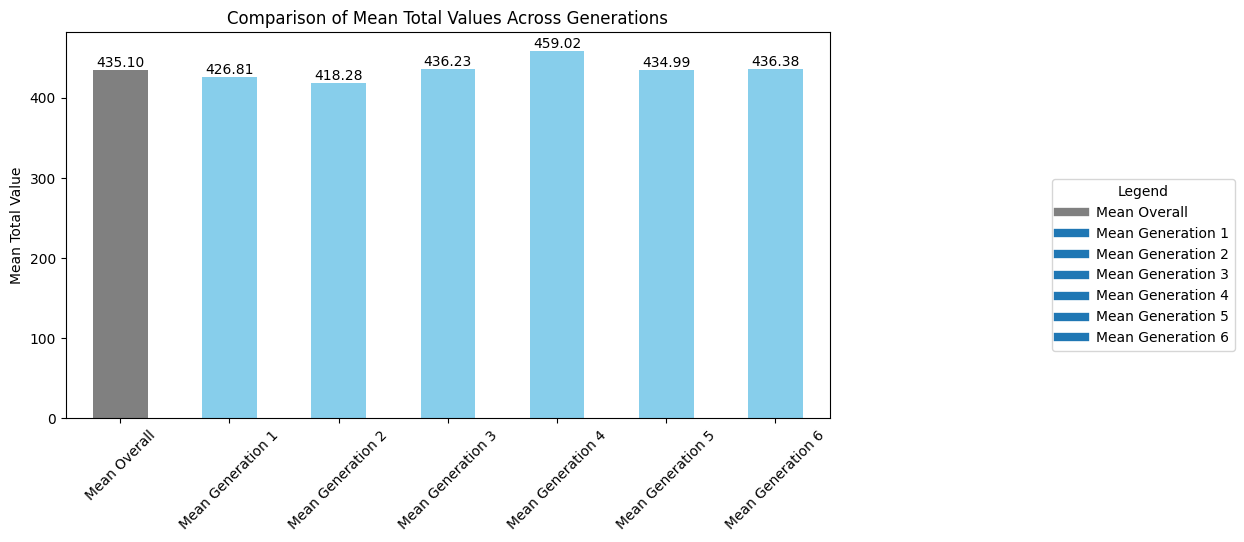

In [157]:
mean_total = df['Total'].mean()
mean_total_generations = {gen: df[df['Generation'] == gen]['Total'].mean() for gen in generations}

data_total = {
    'Category': ['Mean Overall'] + [f'Mean Generation {gen}' for gen in generations],
    'Total': [mean_total] + [mean_total_generations[gen] for gen in generations]
}

mean_total_df = pd.DataFrame(data_total)

fig, ax = plt.subplots(figsize=(10, 6))
mean_total_df.plot(kind='bar', x='Category', y='Total', ax=ax, color=['grey'] + ['skyblue'] * len(generations), legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

ax.set_title('Comparison of Mean Total Values Across Generations')
ax.set_xlabel('')
ax.set_ylabel('Mean Total Value')
ax.tick_params(axis='x', rotation=45)

handles, labels = [plt.Line2D([0], [0], color='grey', linewidth=6)], ['Mean Overall']
handles += [plt.Line2D([0], [0], linewidth=6)] * len(generations)
labels += [f'Mean Generation {gen}' for gen in generations]
fig.legend(handles, labels, title='Legend', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout(rect=[0, 0.03, 0.85, 0.95])
plt.show()

The skills (Total, HP, Attack, Special Attack, Special Defense, Defense, Speed) possessed by Pokémon in Generation 4 are above the average skills of all generations. Despite having the highest average skills in most categories, Generation 4 Pokémon do not appear in the top 5 rankings for these attributes.

# Conclusion

Generation 4 Pokémon generally exhibit superior average stats across multiple attributes, indicating a well-rounded strength profile. However, this does not translate to top-tier individual performance in specific categories, possibly suggesting a balance or lack of standout extremes in any particular skill. The prevalence of dual type among top performers indicates that having multiple types may contribute to higher overall effectiveness in battle.